In [1]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import to_categorical

import os
import sys  
sys.path.insert(0, 'C:\\Developer\\MWCNN')

from Layers.DMWT import *
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
nb_classes = 10
batch_size = 32
epochs = 40

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (32, 32, 3) 

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0

x_test = x_test.astype('float32') / 255.0


170500096/170498071 [==============================] - 29s 0us/step


In [3]:

x_input = layers.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), padding='same', activation="relu")(x_input)
x = DMWT('dd2')(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(nb_classes, activation="softmax")(x)

model = Model(x_input, x, name="mymodel")
model.summary()



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dmwt (DMWT)                  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
____________________________________________

In [4]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [5]:
history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 - 327s - loss: 2.1007 - acc: 0.2427 - val_loss: 1.9292 - val_acc: 0.3283
Epoch 2/40
40000/40000 - 330s - loss: 1.8822 - acc: 0.3426 - val_loss: 1.8281 - val_acc: 0.3630
Epoch 3/40
40000/40000 - 330s - loss: 1.7937 - acc: 0.3726 - val_loss: 1.7604 - val_acc: 0.3859
Epoch 4/40
40000/40000 - 323s - loss: 1.7314 - acc: 0.3967 - val_loss: 1.7131 - val_acc: 0.4091
Epoch 5/40
40000/40000 - 331s - loss: 1.6862 - acc: 0.4142 - val_loss: 1.6735 - val_acc: 0.4216
Epoch 6/40
40000/40000 - 328s - loss: 1.6437 - acc: 0.4286 - val_loss: 1.6296 - val_acc: 0.4415
Epoch 7/40
40000/40000 - 332s - loss: 1.6023 - acc: 0.4419 - val_loss: 1.5982 - val_acc: 0.4472
Epoch 8/40
40000/40000 - 247s - loss: 1.5614 - acc: 0.4565 - val_loss: 1.5510 - val_acc: 0.4639
Epoch 9/40
40000/40000 - 231s - loss: 1.5236 - acc: 0.4673 - val_loss: 1.5204 - val_acc: 0.4727
Epoch 10/40
40000/40000 - 227s - loss: 1.4855 - acc: 0.4806 - val_loss: 1.4853 - val_a

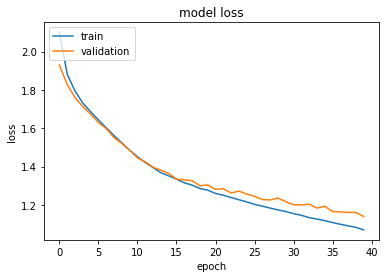

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()